In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M = 51
x = np.linspace(-3,3,M)
y = np.linspace(-3,3,M)
z = np.linspace(-3,3,M)
r_av = 0.8936
r_nmax = 0

In [3]:
import pandas as pd
df = pd.read_csv('dmc.csv')
data = df.to_numpy()
E = data[:,2]
E_var = data[:,3]
r = data[:,2]

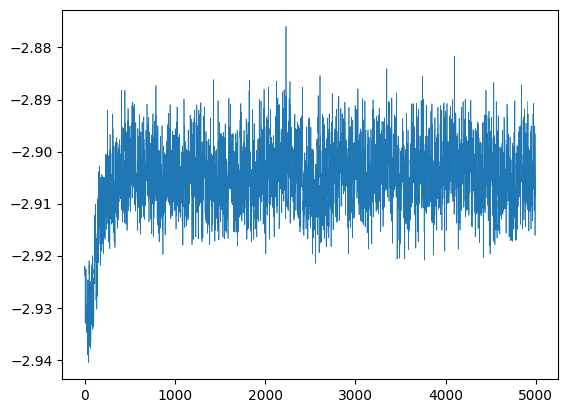

In [4]:
plt.plot(E,lw=0.5)

In [5]:
#GOOD CODE

In [6]:
n_block = np.load(open('n_block.npy','rb'))
rho1_block = np.load(open('rho1_block.npy','rb'))
rho2_block = np.load(open('rho2_test.npy','rb'))
#rho3_block = np.load(open('rho3_block.npy','rb'))
print(n_block.shape)

(50, 51, 51, 51)


In [7]:
W = 10 #Number of batches to discard of 100 steps, steps discarded = W*100
n = np.average(n_block[W:],axis=0)
n_err = np.std(n_block[W:],axis=0)

rho1 = np.average(rho1_block[W:],axis=0)
rho1_err = np.std(rho1_block[W:],axis=0)/np.sqrt(1)

rho2 = np.average(rho2_block[W:],axis=0)
rho2_err = np.std(rho2_block[W:],axis=0)
'''
rho3 = np.average(rho3_block[W:],axis=0)
rho3_err = np.std(rho3_block[W:],axis=0)
'''

'\nrho3 = np.average(rho3_block[W:],axis=0)\nrho3_err = np.std(rho3_block[W:],axis=0)\n'

In [8]:
#LET US DO SOME CHECKS
max_index = np.argmax(n)
max_coords = np.unravel_index(max_index, n.shape)
print('Density is max at', 'x=', x[max_coords[0]],'y=', y[max_coords[1]],'z=', z[max_coords[2]])
print('Integrated density =',np.sum(n), ' Should equal #electrons')

Density is max at x= 0.0 y= 0.0 z= 0.0
Integrated density = 2.0  Should equal #electrons


In [9]:
#x

In [10]:
#rho1
s1 = np.array([0,0,0])
x1_index = np.argmin(np.abs(x - s1[0]))
y1_index = np.argmin(np.abs(y - s1[1]))
z1_index = np.argmin(np.abs(z - s1[2]))

rh1 = rho1[x1_index,y1_index,z1_index]
rh1_err = rho1_err[x1_index,y1_index,z1_index]

n_s1 = n[x1_index,y1_index,z1_index]
n_err_s1 = n_err[x1_index,y1_index,z1_index]

print('n(s1)=',np.round(n_s1,4),'±',np.round(n_err_s1,4),'and rho(s1,s1)=',np.round(rh1,4), '±', np.round(rh1_err,4))
f = n_s1/rh1

n(s1)= 0.005 ± 0.0001 and rho(s1,s1)= 0.0056 ± 0.0001


In [11]:
#rho2
s2 = np.array([0.96,0,0])
x2_index = np.argmin(np.abs(x - s2[0]))
y2_index = np.argmin(np.abs(y - s2[1]))
z2_index = np.argmin(np.abs(z - s2[2]))

rh2 = rho2[x2_index,y2_index,z2_index]
rh2_err = rho2_err[x2_index,y2_index,z2_index]

n_s2 = n[x2_index,y2_index,z2_index]
n_err_s2 = n_err[x2_index,y2_index,z2_index]

print('n(s2)=',n_s2,'±',n_err_s2,'and rho(s2,s2)=',rh2, '±', rh2_err)

n(s2)= 0.00019450300990033034 ± 1.3064343596727704e-05 and rho(s2,s2)= 0.0002220432640413065 ± 6.395929528055026e-05


#rho3
s3 = np.array([0.36,0,0])
x3_index = np.argmin(np.abs(x - s3[0]))
y3_index = np.argmin(np.abs(y - s3[1]))
z3_index = np.argmin(np.abs(z - s3[2]))

rh3 = rho3[x3_index,y3_index,z3_index]
rh3_err = rho3_err[x3_index,y3_index,z3_index]

n_s3 = n[x3_index,y3_index,z3_index]
n_err_s3 = n_err[x3_index,y3_index,z3_index]

print('n(s3)=',n_s3,'±',n_err_s3,'and rho(s3,s3)=',rh3, '±', rh3_err)

# Plots

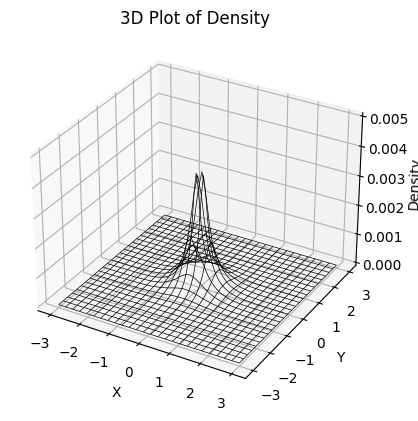

In [12]:
X, Y = np.meshgrid(x, y)

# Create a new figure and axis for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
slice_n = n[:,:,z1_index]

# Plot the surface
#surf = ax.plot_surface(X, Y, slice_n, cmap='viridis', edgecolor='none')
#fig.colorbar(surf, label='Density')
surf = ax.plot_wireframe(X, Y, slice_n, color='k',linewidth = 0.5) # You can specify any colormap you want

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('3D Plot of Density')

plt.show()

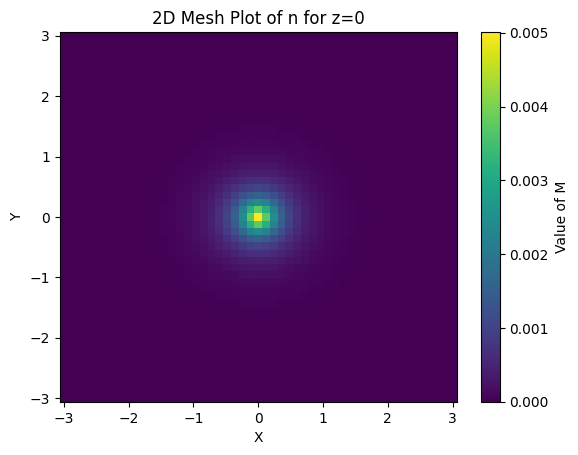

In [13]:
#Density 
slice_n = n[:,:,z1_index]
# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)
plt.figure()
plt.pcolormesh(X, Y, slice_n, shading='auto')
plt.colorbar(label='Value of M')
#plt.contour(X, Y, slice_n, colors='k', linestyles='dotted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Mesh Plot of n for z=0')
plt.show()

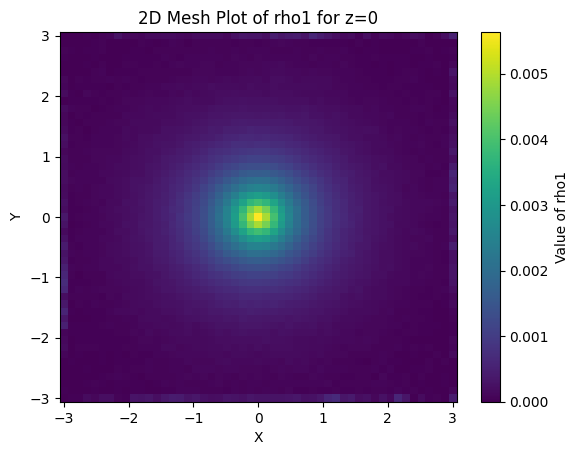

In [14]:
#Density 
slice_rho1 = rho1[:,:,z1_index]
# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)
plt.figure()
plt.pcolormesh(X, Y, slice_rho1, shading='auto')
plt.colorbar(label='Value of rho1')
#plt.contour(X, Y, slice_rho1, colors='k', linestyles='dotted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Mesh Plot of rho1 for z=0')
plt.show()

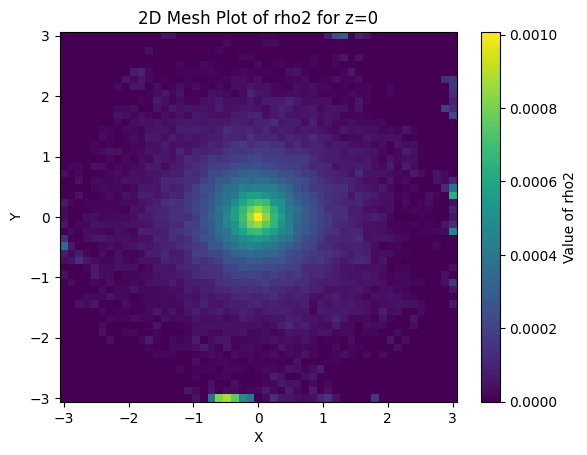

In [15]:
#Density 
slice_rho2 = rho2[:,:,z2_index]
# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)
plt.figure()
plt.pcolormesh(X, Y, slice_rho2, shading='auto')
plt.colorbar(label='Value of rho2')
#plt.contour(X, Y, slice_rho2, colors='k', linestyles='dotted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Mesh Plot of rho2 for z=0')
plt.show()

#Density 
slice_rho3 = rho3[:,:,z3_index]
# Create meshgrid for x and y
X, Y = np.meshgrid(x, y)
plt.figure()
plt.pcolormesh(X, Y, slice_rho3, shading='auto')
plt.colorbar(label='Value of rho3')
#plt.contour(X, Y, slice_rho3, colors='k', linestyles='dotted')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Mesh Plot of rho3 for z=0')
plt.show()

# Linear plots


In [16]:
rho1_line = rho1[25:,25,25][:-1]
rho1_err_line = rho1_err[25:,25,25][:-1]
rho1_err_line_fix = np.where(rho1_err_line == 0, 1e-5, rho1_err_line) #Some values have 0 uncertainty

x_line=x[25:][:-1]

def func(x,c):
    return c*np.exp(-2*x)
from scipy.optimize import curve_fit
# Perform curve fitting with weighted least squares
popt1, pcov1 = curve_fit(func, x_line, rho1_line, absolute_sigma=True, sigma=rho1_err_line_fix)
xextr = np.linspace(0,3,100)

In [17]:
popt2

NameError: name 'popt2' is not defined

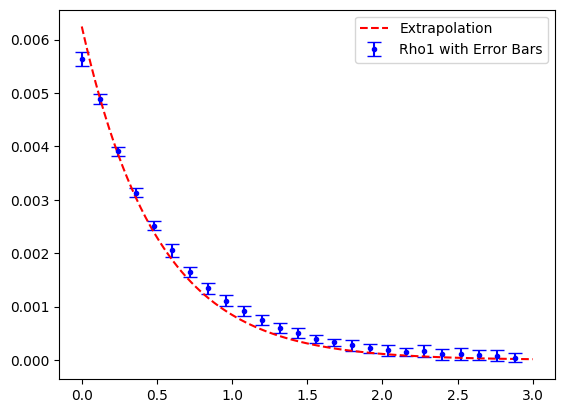

In [ ]:
plt.errorbar(x_line, rho1_line, yerr=rho1_err_line, fmt='o', capsize=5, label='Rho1 with Error Bars',ms=3,c='b')
plt.plot(xextr, func(xextr, popt1[0]), label = 'Extrapolation',c='r',ls='--')
plt.legend()

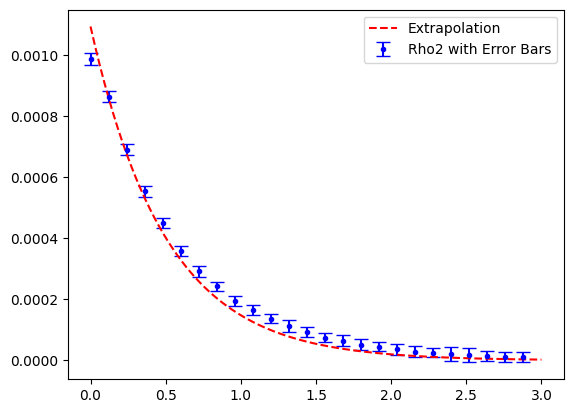

In [ ]:
rho2_line = rho2[25:,25,25][:-1]
rho2_err_line = rho2_err[25:,25,25][:-1]
rho2_err_line_fix = np.where(rho2_err_line == 0, 1e-5, rho2_err_line) #Some values have 0 uncertainty

x_line=x[25:][:-1]

# Perform curve fitting with weighted least squares
popt2, pcov2 = curve_fit(func, x_line, rho2_line, absolute_sigma=True, sigma=rho2_err_line_fix)
xextr = np.linspace(0,3,100)

plt.errorbar(x_line, rho2_line, yerr=rho2_err_line, fmt='o', capsize=5, label='Rho2 with Error Bars',ms=3,c='b')
plt.plot(xextr, func(xextr, popt2[0]), label = 'Extrapolation',c='r',ls='--')
plt.legend()

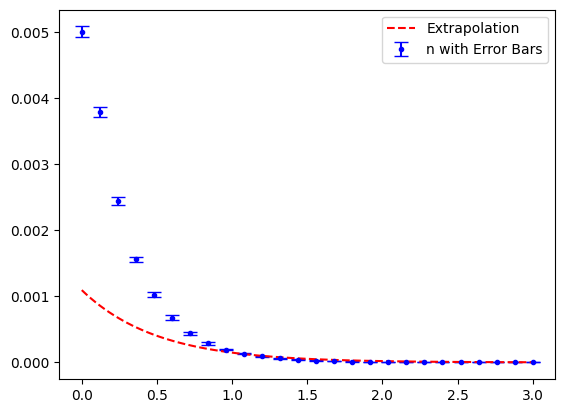

In [ ]:
n_line = n[25:,25,25]
n_err_line = n_err[25:,25,25]
n_err_line_fix = np.where(n_err_line == 0, 1e-4, n_line) #Some values have 0 uncertainty
x_line=x[25:]

popt_n, pcov_n = curve_fit(func, x_line, n_line, absolute_sigma=True, sigma=n_err_line_fix)



plt.errorbar(x_line, n_line, yerr=n_err_line, fmt='o', capsize=5, label='n with Error Bars',ms=3,c='b')
plt.plot(xextr, func(xextr, popt2[0]), label = 'Extrapolation',c='r',ls='--')
plt.legend()